In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl, matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
%matplotlib inline

from sklearn import preprocessing

In [2]:
tvdb_series_df = pd.read_csv("data/output/tvdb_series.csv", index_col="imdb_id")
my_ratings_df = pd.read_csv("data/input/my_ratings.csv", index_col="imdb_id")
imdb_series_df = pd.read_csv("data/output/imdb_series.csv", index_col="id")

In [3]:
cols_to_use = tvdb_series_df.columns.difference(imdb_series_df.columns)
df1 = pd.merge(imdb_series_df, tvdb_series_df[cols_to_use], how="outer", left_index=True, right_index=True)

cols_to_use = my_ratings_df.columns.difference(df1.columns)
tv_df = pd.merge(df1, my_ratings_df[cols_to_use], how="outer", left_index=True, right_index=True)
tv_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1937 entries, tt0092337 to tt9879074
Data columns (total 86 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1936 non-null   object 
 1   type               1936 non-null   object 
 2   start_year         1936 non-null   float64
 3   end_year           1084 non-null   float64
 4   ep_length          1936 non-null   float64
 5   n_seasons          1936 non-null   object 
 6   n_episodes         1936 non-null   float64
 7   popularity_rank    1936 non-null   float64
 8   n_ratings          1936 non-null   float64
 9   rating_avg         1936 non-null   float64
 10  rating_top1000     1936 non-null   float64
 11  rating_us          1936 non-null   float64
 12  rating_row         1936 non-null   float64
 13  rating_M           1936 non-null   float64
 14  rating_F           1936 non-null   float64
 15  rating_0to18       1936 non-null   object 
 16  rating_M_0to18  

# Handling missing data

Remove empty correlation columns


# Correlation

In [4]:
corr_matrix = tv_df.corr()

In [5]:
my_rating_corr = corr_matrix["my_rating"]
genres_mask = corr_matrix.filter(like="genre").columns
rating_mask = corr_matrix.filter(like="rating").columns.drop(["my_rating"])

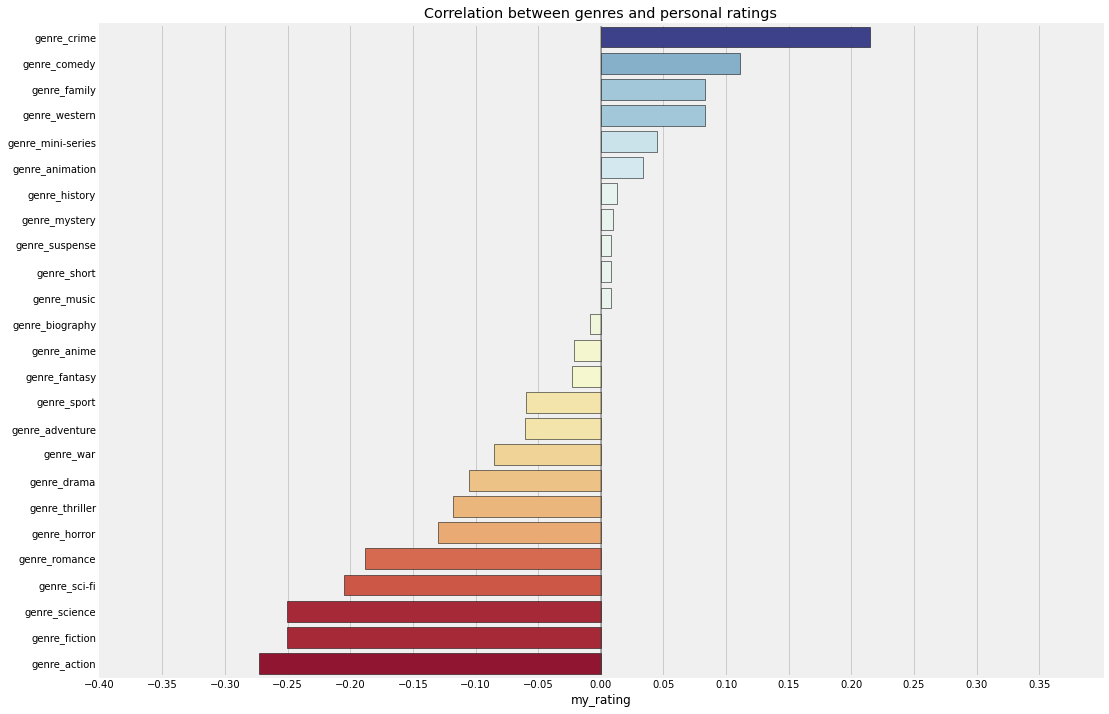

In [19]:
fig, ax = plt.subplots(figsize=(16,12))
ax.set_title("Correlation between genres and personal ratings")
ax.set_xlim(-0.4,0.4)
ax.xaxis.set_ticks(np.arange(-0.4, 0.4, 0.05))

# Sorte values.
sorted_corr_genres = my_rating_corr[genres_mask].sort_values(ascending=False)
# Remove nan values.
sorted_corr_genres = sorted_corr_genres[np.logical_not(np.isnan(sorted_corr_genres))]
# Normalize values to assign proper colors.
norm_sorted_corr_genres = preprocessing.MinMaxScaler().fit_transform(sorted_corr_genres.values.reshape(-1,1)).flatten()

plt.axvline(color='#414141', linewidth=1.5, alpha=.5)
sns.barplot(y=sorted_corr_genres.index, x=sorted_corr_genres, ax=ax, palette=mpl.cm.RdYlBu(norm_sorted_corr_genres), edgecolor="black");

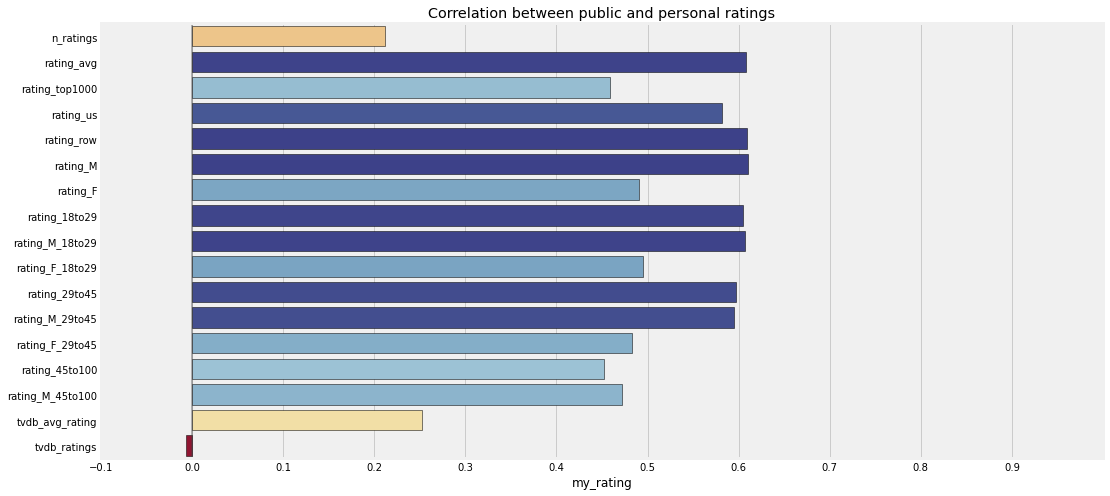

In [7]:
fig, ax = plt.subplots(figsize=(16,8))
ax.set_title("Correlation between public and personal ratings")
ax.set_xlim(-0.1,1.0)
ax.xaxis.set_ticks(np.arange(-0.1, 1.0, 0.10))

sorted_corr_rating = my_rating_corr[rating_mask]
norm_sorted_corr_rating = preprocessing.MinMaxScaler().fit_transform(sorted_corr_rating.values.reshape(-1,1)).flatten()

plt.axvline(color='#414141', linewidth=1.5, alpha=.5)
sns.barplot(y=sorted_corr_rating.index, x=sorted_corr_rating, ax=ax, palette=mpl.cm.RdYlBu(norm_sorted_corr_rating), edgecolor="black");

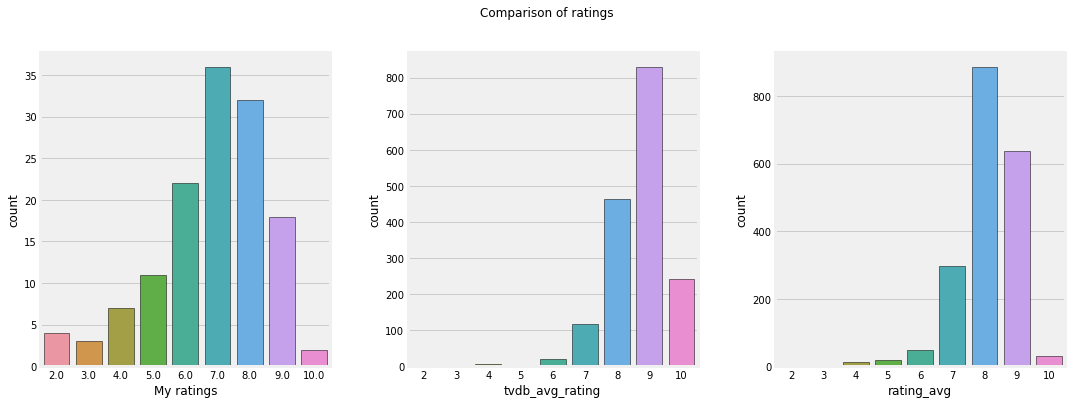

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 6), gridspec_kw={"width_ratios": [1, 1, 1]})
fig.tight_layout(pad=5.0)
fig.suptitle("Comparison of ratings")

sns.countplot(tv_df["my_rating"], ax=ax1, edgecolor="#000000")
ax1.set_xlabel("My ratings")

# Discretizing and plotting TVDb ratings.
disc = pd.cut(tv_df["tvdb_avg_rating"], bins=range(1,11))
sns.countplot(disc.map(lambda x: x.right), ax=ax2, edgecolor="#000000")

# Discretizing and plotting IMDb ratings.
disc = pd.cut(tv_df["rating_avg"], bins=range(1,11))
sns.countplot(disc.map(lambda x: x.right), ax=ax3, edgecolor="#000000")

plt.show()

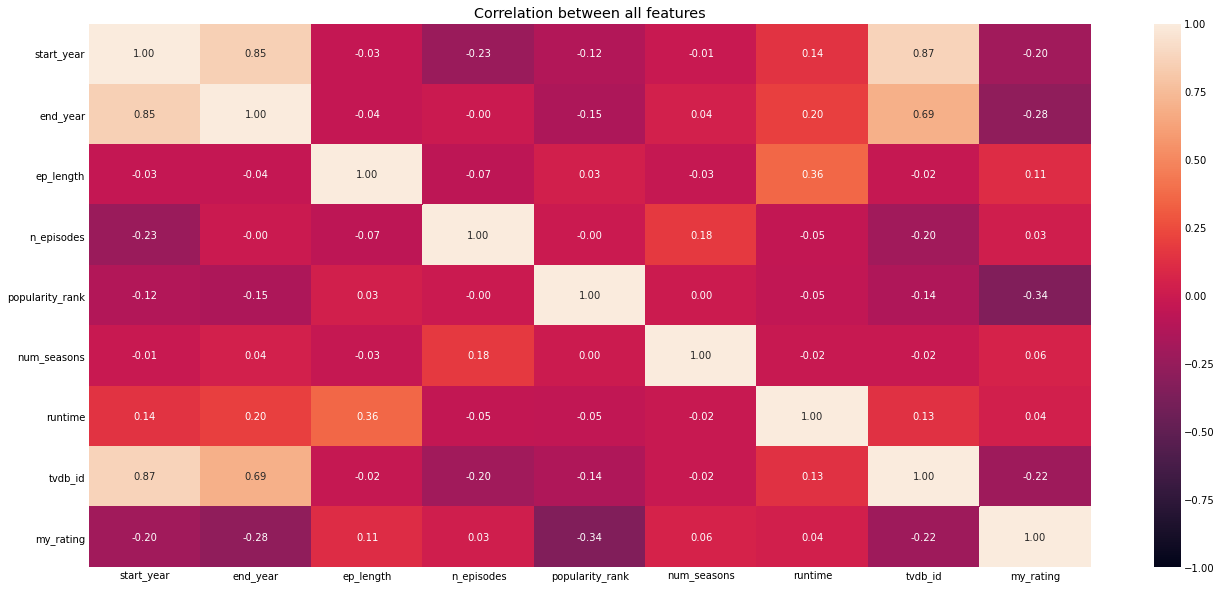

In [9]:
fig, ax = plt.subplots(figsize=(20, 10))
mask = rating_mask.append(genres_mask)
ax = sns.heatmap(tv_df.drop(mask, axis=1).corr(), annot=True, fmt=".2f", vmin=-1, vmax=1)
ax.set_title("Correlation between all features");